## Project: Applying NLP to Major Tasks
#### PROG8245- Machine Learning Programming

| Professor     | Islam Mahmoud               |
|---------------|-----------------------------|
| Email         | imahmoud@conestogac.on.ca   |
| Deadline      | Monday, December 9th, 2024  |
| Group         | Group 10                    |
| Members       | Burman, Jaiv Chaitanya      |
|               | Lad, Khushbu Nileshkumar    |
|               | Madhav, Akshata Ajay        |


### Data Collection

#### Collect a dataset of product reviews. 

##### Rectangular Dataset

- Kaggle Reference : https://www.kaggle.com/datasets/konradb/inside-airbnb-usa/data
- Utilised reviews for : Hawaii
    1. reviews_detailed.csv
    2. listings.csv

##### Import Libraries

In [20]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # For lemmatization
from deep_translator import GoogleTranslator # For translating review
import string
import nltk
nltk.download('wordnet')
from multiprocessing import Pool
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Khushbu.Lad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Load Dataset classes and methods

In [21]:
class ReviewsDataset:
    def __init__(self):
        self.listing_file_path = './Dataset/FinalProject/listings.csv'
        self.listing_data = None
        self.reviews_file_path = './Dataset/FinalProject/reviews_detailed.csv'
        self.reviews_data = None
        self.merged_data=None
        self.preprocessed_reviews_file_path = './Dataset/FinalProject/processed_reviews.csv'
        self.is_preprocessed = False
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.listing_data = pd.read_csv(self.listing_file_path)
        print(f"---> Load Listing List \r\n")
        print(f"listings.csv : Data loaded successfully.")
        print(f"Total Records : {self.listing_data.shape[0]} \r\n")

        print(f"---> Load Reviews List \r\n")
        if(os.path.exists(self.preprocessed_reviews_file_path)):
            self.reviews_data = pd.read_csv(self.preprocessed_reviews_file_path)
            print(f"reviews_detailed.csv : Data loaded successfully. ( Preprocessed data )")
            self.is_preprocessed=True
        else:
            self.reviews_data = pd.read_csv(self.reviews_file_path)
            print(f"processed_reviews.csv : Data loaded successfully.")
        print(f"Total Records : {self.reviews_data.shape[0]} \r\n")

    # Print shape of data
    def print_shape(self):
        try:
            print(f"Total Records : Listing : {self.listing_data.shape[0]}")
        except:
            print(f"Total Records : Listing : Not initialized")
        try:
            print(f"Total Records : Review  : {self.reviews_data.shape[0]}")
        except:
            print(f"Total Records : Review : Not initialized")
        try:
            print(f"Total Records : Merged  : {self.merged_data.shape[0]}")
        except:
            print(f"Total Records : Merged : Not initialized")

    
    def merge_data(self):
        # Merge data using common field recepe Id
        self.merged_data = pd.merge(self.listing_data, self.reviews_data, left_on='id', right_on='listing_id')
        print("Data Merged Successfully")
        print(f"Total Records : {self.merged_data.shape[0]} \r\n")



##### The Main function : initialize class object and load data

In [22]:
if __name__ == "__main__":
    # Create an instance of the ReviewsDataset  class and load data
    review_dataset = ReviewsDataset()
    review_dataset.load_data()


---> Load Listing List 

listings.csv : Data loaded successfully.
Total Records : 30760 

---> Load Reviews List 

reviews_detailed.csv : Data loaded successfully. ( Preprocessed data )
Total Records : 1019922 



In [23]:
review_dataset.reviews_data.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,CleanedComment,LemmatizedWords,negative,neutral,positive,compound,sentiment
0,3002,63686,2010-07-11,155310,Debbie,"Lynne is very kind and accommodating, the loca...",Lynne kind accommodating location ca n't beat ...,"['Lynne', 'kind', 'accommodating', 'location',...",0.054,0.674,0.272,0.8169,Good
1,3002,71254,2010-07-31,75939,Bonnie,I came back to the island on my own for my 25t...,came back island 25th HS reunion wanted come b...,"['came', 'back', 'island', '25th', 'HS', 'reun...",0.012,0.811,0.177,0.9674,Good
2,3002,132520,2010-11-02,189930,Alexandra,I had a wonderfull time in Hawaii. Lynne is a ...,wonderfull time Hawaii Lynne super-super host ...,"['wonderfull', 'time', 'Hawaii', 'Lynne', 'sup...",0.000,0.716,0.284,0.9257,Good


In [24]:
review_dataset.listing_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",3364,Lynne,Honolulu,Primary Urban Center,21.27563,-157.82297,Entire home/apt,85,5,242,2023-01-23,1.57,1,2,2,92- 0251181
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,185,5,26,2023-02-25,0.18,4,298,10,119-269-5808-01R
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,105,5,206,2023-02-01,1.29,3,239,18,NaN


##### Null check : Eliminate missing values : listing data

In [25]:
review_dataset.listing_data.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6793
reviews_per_month                 6793
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5334
dtype: int64

In [26]:
review_dataset.listing_data.dropna(inplace=True)

##### Null check : Eliminate missing values : reviews detail

In [27]:
review_dataset.reviews_data.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments           0
CleanedComment     0
LemmatizedWords    0
negative           0
neutral            0
positive           0
compound           0
sentiment          0
dtype: int64

In [28]:
review_dataset.reviews_data.dropna(inplace=True)

##### Review shape after null data elimination

In [29]:
review_dataset.print_shape()

Total Records : Listing : 20288
Total Records : Review  : 1019922
Total Records : Merged : Not initialized


### Annotate the dataset with labels of positive, negative or neutral sentiment, based on collected data.

**Tool** : VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [30]:
# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    result =""
    if(sentiment['compound']<0.5):
        result="Bad"
    elif(sentiment['compound']>0.5):
        result="Good"
    elif(sentiment['compound']==0.5):
        result="Neutral"
    return pd.Series([sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound'],result ])

# tqdm.pandas()
# review_dataset.reviews_data[['negative', 'neutral', 'positive', 'compound','sentiment']] = review_dataset.reviews_data['comments'].progress_apply(get_sentiment_scores)
# review_dataset.reviews_data.to_csv(review_dataset.preprocessed_reviews_file_path, index=False)


# If previously saved data found, do not reprocess
if(review_dataset.is_preprocessed == False):
    tqdm.pandas()
    review_dataset.reviews_data[['negative', 'neutral', 'positive', 'compound','sentiment']] = review_dataset.reviews_data['comments'].progress_apply(get_sentiment_scores)
else:
    # Show message if data is already loaded
    print("Note : Loaded already saved preprocessed data. Go to next step.")

Note : Loaded already saved preprocessed data. Go to next step.


##### Plot the results

sentiment
Good       928617
Bad         91301
Neutral         4
Name: count, dtype: int64


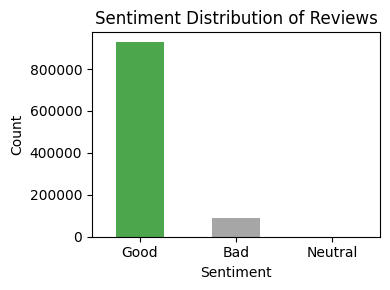

In [31]:
sentiment_counts = review_dataset.reviews_data['sentiment'].value_counts()
print(sentiment_counts)
# Plotting sentiment distribution without border
plt.figure(figsize=(4, 3))
sentiment_counts.plot(
    kind='bar', 
    color=['green', 'gray', 'red'], 
    alpha=0.7, 
    edgecolor='none'  # Removes border from bars
)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

### Preprocessing

1. Perform necessary text preprocessing steps such as tokenization, stop-word removal, stemming/lemmatization, and lowercasing. 
2. Remove any irrelevant columns, handle missing values, and clean text data by removing special characters, stopwords, and performing stemming/lemmatization
3. Handle specific challenges of used text like hashtags, emojis, and slang.

In [32]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
translator = GoogleTranslator(source='auto', target='en')

def PreprocessReviewComment(comment):
    try:
        # Ensure the input is a string
        if not isinstance(comment, str):
            return "",[]

        # Translate to english if other language is detected
        # try:
        #     lang = detect(comment)
        # except LangDetectException:
        #     lang = "unknown"
        translated = comment
        # if lang != "en": 
        #     translated = translator.translate(comment)

        # Tokenization
        word_tokens = word_tokenize(translated) 

        # Remove Stop words and case folding
        stop_words_removed = [word for word in word_tokens if word.lower() not in stop_words]

        # Remove punctuation
        punctuation_removed = [word for word in stop_words_removed if word not in string.punctuation]

        # Lemmatization
        lemmatize_words = [lemmatizer.lemmatize(word) for word in punctuation_removed]

        cleaned_comment = ' '.join(lemmatize_words)
        return cleaned_comment,lemmatize_words
    except:
        return "FAILED",["FAILED"]
    
if(review_dataset.is_preprocessed == False):
    # Initialise plugin for progress
    tqdm.pandas()
    # Preprocess data
    review_dataset.reviews_data[['CleanedComment', 'LemmatizedWords']] = review_dataset.reviews_data['comments'].progress_apply(
        lambda x: pd.Series(PreprocessReviewComment(x))
    )
else:
    # Show message if data is already loaded
    print("Note : Loaded already saved preprocessed data. Go to next step.")

Note : Loaded already saved preprocessed data. Go to next step.


##### Save Preprocessed data in file
- Preprocessing is time taking
- Save and reuse preprocessed data if available
- Translation is taking time so commented (will uncomment and run if time permits)

In [33]:
# Save intermediate data
if(review_dataset.is_preprocessed == False):
    review_dataset.reviews_data.to_csv(review_dataset.preprocessed_reviews_file_path, index=False)
    print("Data saved successfully at {}")


##### Review processed data

In [34]:
review_dataset.reviews_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,CleanedComment,LemmatizedWords,negative,neutral,positive,compound,sentiment
0,3002,63686,2010-07-11,155310,Debbie,"Lynne is very kind and accommodating, the loca...",Lynne kind accommodating location ca n't beat ...,"['Lynne', 'kind', 'accommodating', 'location',...",0.054,0.674,0.272,0.8169,Good
1,3002,71254,2010-07-31,75939,Bonnie,I came back to the island on my own for my 25t...,came back island 25th HS reunion wanted come b...,"['came', 'back', 'island', '25th', 'HS', 'reun...",0.012,0.811,0.177,0.9674,Good
2,3002,132520,2010-11-02,189930,Alexandra,I had a wonderfull time in Hawaii. Lynne is a ...,wonderfull time Hawaii Lynne super-super host ...,"['wonderfull', 'time', 'Hawaii', 'Lynne', 'sup...",0.000,0.716,0.284,0.9257,Good
3,3002,158315,2010-12-25,291487,Shirley,"Lynn was a wonderful hostess and is a lovely, ...",Lynn wonderful hostess lovely friendly kind he...,"['Lynn', 'wonderful', 'hostess', 'lovely', 'fr...",0.000,0.390,0.610,0.9337,Good
4,3002,168133,2011-01-08,331679,Elizabeth,"Just a short walk to Waikiki beach, restaurant...",short walk Waikiki beach restaurant shopping P...,"['short', 'walk', 'Waikiki', 'beach', 'restaur...",0.000,0.803,0.197,0.8442,Good


### Feature Extraction and Model Comparison

Explore different feature representation methods such as bag-of-words, TF-IDF, word embeddings (e.g., Word2Vec or GloVe), or contextual embeddings (e.g., BERT or GPT). Experiment with 3 different feature extraction techniques to capture meaningful representations of social media text where the 3 techniques should be of different word embedding categories.

#### TF-IDF

#### Model Building
- Choose a suitable machine learning algorithm (e.g., Naive Bayes, SVM, or neural networks) or deep learning model
- Split the dataset into training and testing sets.
- Train the selected model using the training data, evaluate and record its performance on the training and testing data.

#### Interpretation of results
- Visualize your results
- Compare different feature representation
- Reach a conclusion on which is the best Embedding technique to use for your model

#### Reference
https://www.kaggle.com/datasets/konradb/inside-airbnb-usa/data